# Amol G. Purkar


# Part I: Unsupervised Learning

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading and displaying the dataset
df=pd.read_csv(r"C:\Users\Amol purkar\Desktop\Imarticus\ML test 2\25 Machine Learning Question Paper 2 with datasets\25 Machine Learning Question Paper 2 with datasets\credit_card.csv",sep=',')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#Getting the shape of the dataset
df.shape

(8950, 18)

In [5]:
#Details about each and every column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Q1. Primary analysis of several categorical features

In [6]:
#Extracting the names of categorical column
cat_col=df.select_dtypes(include=['object']).columns.tolist()
cat_col

['CUST_ID']

In [7]:
df.CUST_ID.nunique()

8950

In [8]:

df.drop('CUST_ID',axis=1,inplace=True)

In [9]:
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


# Q2. Exploratory Data Analysis tasks

<AxesSubplot:>

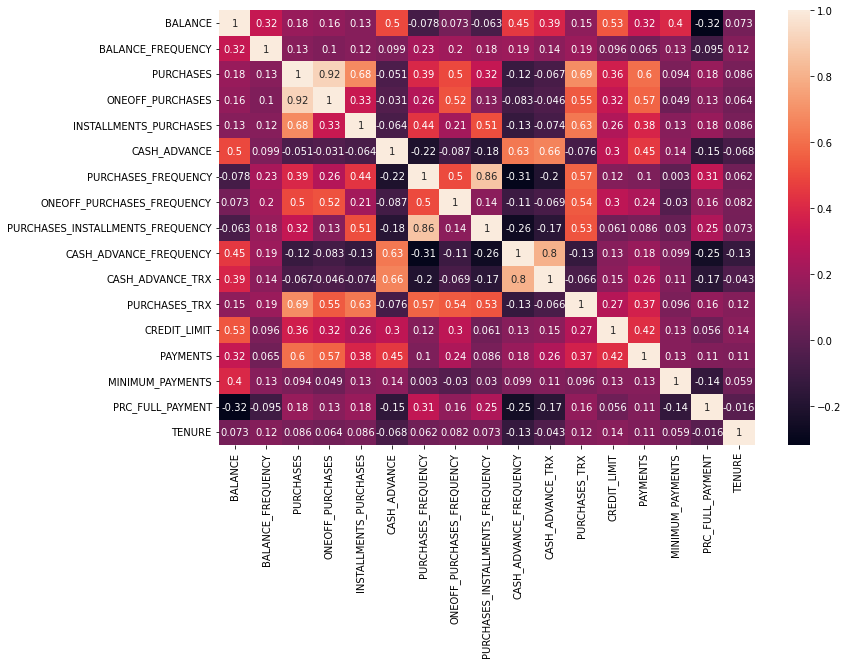

In [10]:
#Checking correlation between variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# a) Missing Value Analysis

In [11]:
df.isnull().sum()[df.isnull().sum()>0]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

In [14]:
df.CREDIT_LIMIT.fillna(round(df.CREDIT_LIMIT.mean()),inplace=True)
df.MINIMUM_PAYMENTS.fillna(round(df.MINIMUM_PAYMENTS.mean()),inplace=True)

In [15]:

df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# b) Outlier Treatment using the Z-score method

In [16]:

from scipy import stats
df = df[(np.abs(stats.zscore(df)) <3).all(axis=1)]
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.000000,0.000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8807,31.734061,0.700000,95.00,95.00,0.00,0.000000,0.100000,0.100000,0.000000,0.000000,0,1,500.0,122.185607,120.666710,0.000,10
8808,385.462843,0.900000,427.10,50.00,377.10,809.585272,0.900000,0.100000,0.800000,0.500000,6,25,1000.0,343.125132,334.254826,0.000,10
8809,5.721468,0.900000,83.43,0.00,83.43,0.000000,0.900000,0.000000,0.800000,0.000000,0,9,1500.0,78.559954,91.631089,0.375,10
8810,28.277795,1.000000,394.80,44.80,350.00,0.000000,1.000000,0.100000,0.900000,0.000000,0,11,1000.0,351.266319,144.369426,1.000,10


# c) Dealing with correlated variables

<AxesSubplot:>

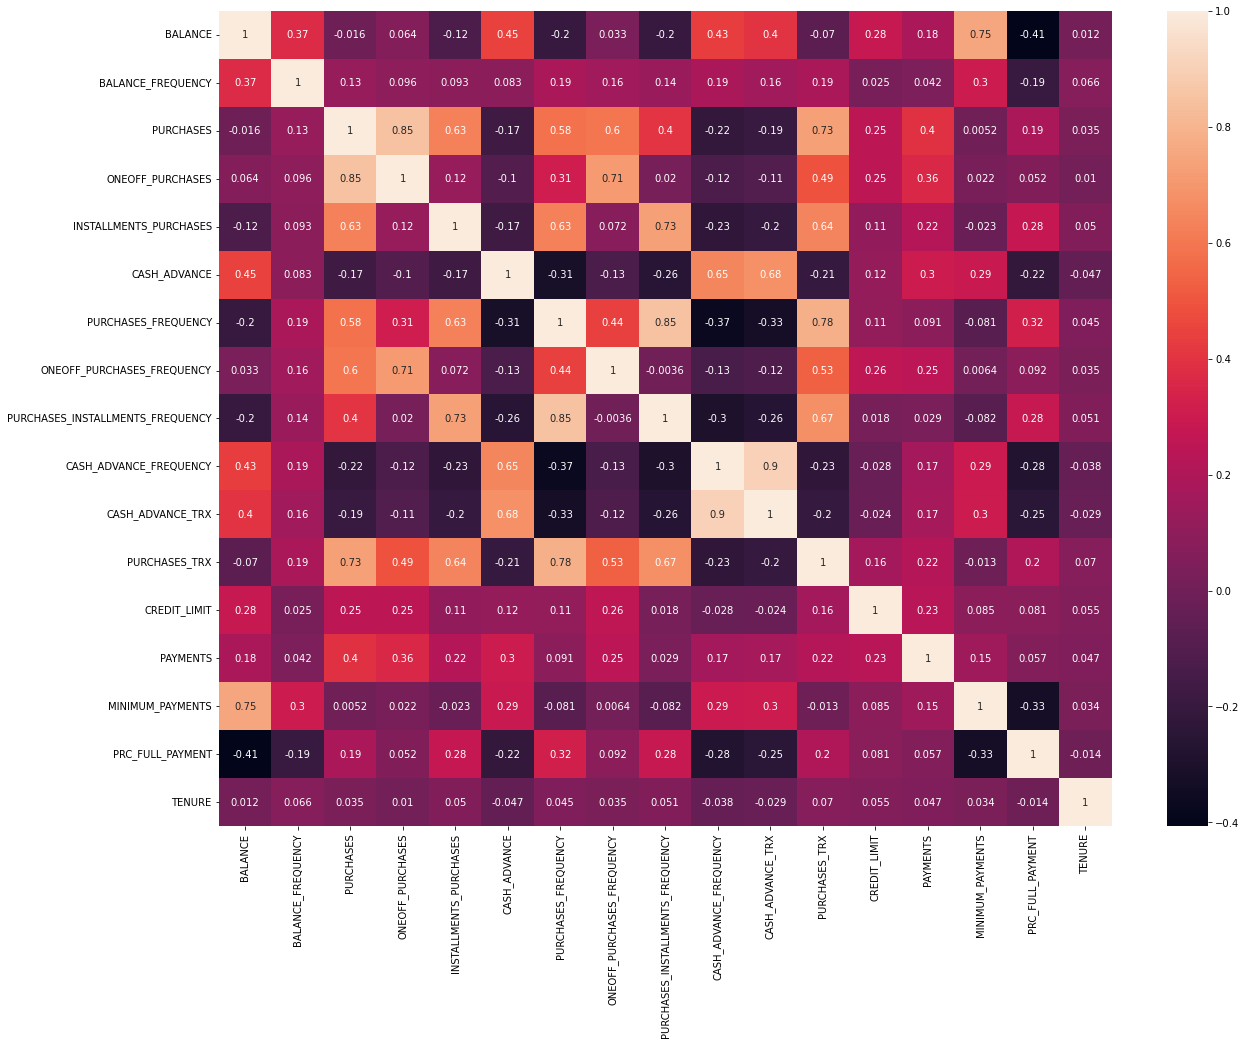

In [17]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True)

In [18]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
df = df.drop(columns=to_drop, axis=1)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.000000,8,1800.0,1400.057770,2407.246035,0.000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8807,31.734061,0.700000,95.00,0.00,0.000000,0.100000,0.100000,0.000000,1,500.0,122.185607,120.666710,0.000,10
8808,385.462843,0.900000,427.10,377.10,809.585272,0.900000,0.100000,0.500000,25,1000.0,343.125132,334.254826,0.000,10
8809,5.721468,0.900000,83.43,83.43,0.000000,0.900000,0.000000,0.000000,9,1500.0,78.559954,91.631089,0.375,10
8810,28.277795,1.000000,394.80,350.00,0.000000,1.000000,0.100000,0.000000,11,1000.0,351.266319,144.369426,1.000,10


# Q3. PCA

In [17]:

from sklearn.decomposition import PCA

In [18]:
sk_pca = PCA(n_components=6)
sk_pca.fit(df)
dset2 = pd.DataFrame()
dset2['pca'] = range(1,7)
dset2['vari'] = pd.DataFrame(sk_pca.explained_variance_ratio_)

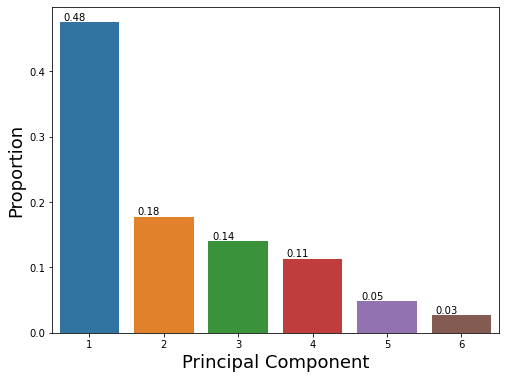

In [20]:
plt.figure(figsize=(8,6))
graph = sns.barplot(x='pca', y='vari', data=dset2)
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                   ha='center', va='bottom',
                   color= 'black')
plt.ylabel('Proportion', fontsize=18)
plt.xlabel('Principal Component', fontsize=18)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


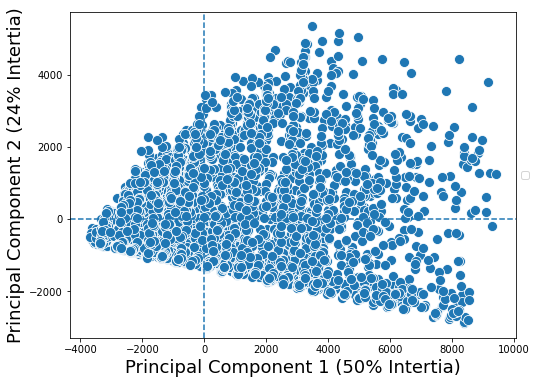

In [21]:
x_pca = sk_pca.transform(df[df.columns])

plt.figure(figsize=(8,6)) 
sns.scatterplot(x_pca[:,0],x_pca[:,1], 
                palette="Set1", legend='full', s=100).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Principal Component 1 (50% Intertia)',fontsize=18)
plt.ylabel('Principal Component 2 (24% Intertia)', fontsize=18)
plt.axvline(0, ls='--') 
plt.axhline(0, ls='--') 
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scale=StandardScaler().fit_transform(df)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Q4. K means - Elbow Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
n_clusters=[2,3,4,5,6,7,8]
for k in n_clusters:
    cluster=KMeans(n_clusters=k , random_state=0)
    predict=cluster.fit_predict(df)
    
    score=silhouette_score(df , predict , random_state=0)
    print('for n_clusters={} , silhoutte score is {}'.format(k, score))

for n_clusters=2 , silhoutte score is 0.47427242763661676
for n_clusters=3 , silhoutte score is 0.3349559087221713
for n_clusters=4 , silhoutte score is 0.38006498796758387
for n_clusters=5 , silhoutte score is 0.32787050063542006
for n_clusters=6 , silhoutte score is 0.2742707152039613
for n_clusters=7 , silhoutte score is 0.2891682588967751
for n_clusters=8 , silhoutte score is 0.28410840029634843


In [23]:
sns.set(style="darkgrid")
from sklearn.cluster import KMeans

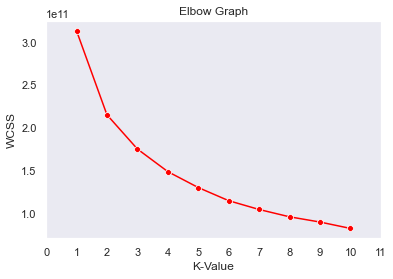

In [24]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="random", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

# Q5.Finding the optimum value of k

In [ ]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 2, random_state=0)

In [26]:
# fit the model
predict=model.fit_predict(df)
score=silhouette_score(df , predict , random_state=0)
print('silhoutte score is {}'.format(score))

silhoutte score is 0.47427242763661676


In [ ]:
data_output = df.copy(deep = True)

In [ ]:
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

In [27]:
# head() to display top five rows
data_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.0,12,0
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.0,12,1
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.000000,0.0,12,1
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.0,12,0
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.000000,8,1800.0,1400.057770,2407.246035,0.0,12,0


In [28]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)  

(array([0, 1]), array([4107, 1696], dtype=int64))

In [ ]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

In [ ]:
# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

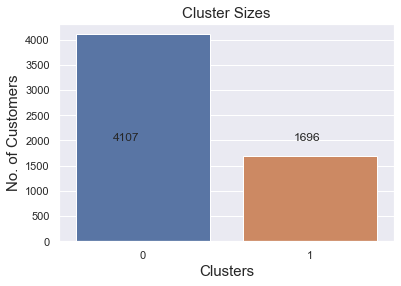

In [29]:
# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])

plt.show()

# Part II: Deep Learning

In [48]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import nltk
import math
import re
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from nltk.corpus import wordnet as w

In [49]:
#Reading and displaying the dataset
df = pd.read_csv(r"C:\Users\Amol purkar\Desktop\Imarticus\ML test 2\25 Machine Learning Question Paper 2 with datasets\25 Machine Learning Question Paper 2 with datasets\Sentiment.csv")
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [50]:
#Getting the shape of the dataset
df.shape

(13871, 21)

In [51]:
#Details about each and every column 
df["sentiment"].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

# Q1. Total Number of Positive and Negative Sentiments

In [52]:
p_count = 0
n_count = 0
for i in df["sentiment"]:
    if i == "Positive":
        p_count += 1
    elif i == "Negative":
        n_count += 1
print("Positive count : ", p_count)
print("Negative count : ", n_count)
print("Total positive and negative count : ", p_count + n_count)

Positive count :  2236
Negative count :  8493
Total positive and negative count :  10729


In [53]:

df = df[df["sentiment"] != "Neutral"]
df.shape

(10729, 21)

# Q2. Sequential LSTM Model

In [54]:
df_new = df[["sentiment", "text"]]
df_new.head()

,sentiment,text
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,Positive,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,Negative,RT @warriorwoman91: I liked her and was happy ...


# Data Preprocessing

In [55]:
def remove_tags(string):
    removelist = ""
    result = re.sub('RT','',string) # Remove RT from text         
    result = result.lower()
    return result
df_new['text'] = df_new['text'].apply(lambda cw : remove_tags(cw))

In [56]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
df_new['text'] = df_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [57]:
# Lemmatizing text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [71]:
# Lemmatizing text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df_new['text'] = df_new.text.apply(lemmatize_text)
df_new.sample(15)

,sentiment,text
7784,Negative,foehammer2008: renomarky: ☑ never watch #kelly...
9682,Positive,pollster called told @realdonaldtrump won! go ...
6547,Negative,#gopdebate --&gt; jeb looked/sounded left horr...
12483,Negative,"@fsxbc: trump sez- four, four time i've taken ..."
8286,Negative,@foxandfriends @megynkelly made @candycrowley ...
8022,Positive,"start th evening, rnc moderator dropped atom b..."
6097,Negative,@ss_howell: #gopdebate #debatewithbernie #blac...
6876,Negative,@theladygrantham: put lord grantham charge don...
6592,Negative,@gop think u stay tl. p.s. f*** @jebbush @marc...
8261,Positive,@lrihendry: #tedcruz headed presidential debat...


In [72]:
# Encoding Labels
reviews = df_new["text"].values
labels = df_new["sentiment"].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [73]:
# Train Test Split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [74]:
# Tokenizing Sentences
vocab_size = 3000 
oov_tok = ''
embedding_dim = 100
max_length = 200 
padding_type='post'
trunc_type='post'

In [75]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

# Building Model

In [76]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [77]:
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [78]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [79]:
prediction = model.predict(test_padded)
pred_labels = []

for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

84/84 [==============================] - 2s 19ms/step
Accuracy of prediction on test set :  0.21133060007454343


# Q3. Checking the sentiment for the following two sentences
a. 'He is a great leader.'
b. 'He is a terrible leader.'

In [80]:
sentence = ["He is a great leader.", 
            "He is a terrible leader."]

In [81]:
sequences = tokenizer.texts_to_sequences(sentence)

In [82]:
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
prediction = model.predict(padded)
pred_labels = []

1/1 [==============================] - 0s 22ms/step


In [83]:
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
        
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

He is a great leader.
Predicted sentiment :  Positive
He is a terrible leader.
Predicted sentiment :  Positive
